In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cd /content/drive/MyDrive

In [8]:

! pip install keras
!pip install keras.utils
! pip install tensorflow
! pip install --upgrade keras
! pip install np_utils
# ! pip install sentence_transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.0
    Uninstalling keras-3.0.0:
      Successfully uninstalled keras-3.0.0


  Using cached keras-3.0.0-py3-none-any.whl (997 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.0.0 which is incompatible.


In [7]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from keras.utils import to_categorical


# Import Plotting Libararies

import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay

#Train and Test Split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

ModuleNotFoundError: ignored

In [ ]:
Couplets = pd.read_csv("/content/drive/MyDrive/Couplets.csv", encoding='utf-8',  names=['couplet','poet'])
print(Couplets['poet'].unique())
xLabels=['Shah Abdul Latif Bhitai', 'Ustad Bukhari', 'Sheikh Ayaz',
 'Masroor Pirzada']
labeler = preprocessing.LabelEncoder()
Couplets['poet'] = labeler.fit_transform(Couplets["poet"])
numLabel=Couplets['poet'].tolist()
print(Couplets.head())
X_train, X_test, Y_train, Y_test = train_test_split(Couplets['couplet'], Couplets['poet'], test_size = 0.20, random_state = 0)

X_train = X_train.to_numpy()
Y_train=(Y_train.astype('int')).to_numpy()
Y_train=np.eye(15)[Y_train-1]
X_test = X_test.to_numpy()
Y_test=(Y_test.fillna(0).astype('int')).to_numpy()
Y_test=np.eye(15)[Y_test-1]

overallA=[]
overallL=[]
models=["Flatten","LSTM","GRU","Convolution"]


['Poet' 'Shah Abdul Latif Bhitai' 'Ustad Bukhari' 'Sheikh Ayaz'
 'Masroor Pirzada']
                                             couplet  poet
0                                            Couplet     1
1  وَحۡدَہٗ جَي وَڍِيا، ڪِئا اِلّاَاللهَ اَڌَ،\nس...     2
2  وَحۡدَہٗ لا شَرِيکَ لَهٗ، اِيُّ ھيڪَڙائِيَ حَق...     2
3  پاڻِهۡ پَسي پاڻَ کي، پاڻِهۡ  ئِي محبوبُ،\r\nپا...     2
4  سو ھِيُ، سو ھُو، سـو اَجلُ، سو اللهُ،\nسو پِري...     2


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("intfloat/multilingual-e5-large")

.gitattributes:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/160k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

onnx/config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/546k [00:00<?, ?B/s]

model.onnx_data:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

onnx/special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

onnx/tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [ ]:
import torch.nn.functional as F
from torch import Tensor
from transformers import AutoTokenizer, AutoModel

def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

# Sindhi couplets as input
sindhi_couplets = [
    'سنڌي ڪَپليٽ 1',
    'سنڌي ڪَپليٽ 2',
    "سنڌي ڪَپليٽ ۾ رڳو ۽ شاعران جي بيٽ مان جي ڪسان ٺرئَ گھڙر ٺيندڙ ڏنيا ڏانهن ، جسماني ۽ روحاني خدمات جي ٻڌ ، تعليمي ۽ سوشيلائي ميدان ۾ ڪام ڪنھيو ٿو.",
    "سنڌي ڪَپليٽ ۾ ڇا سانگت کان ڏانهن ڏانهن چوڏ ڏوڻ جي تاريخي اهميت ڏيڪارو آهي ، جيڪي سنڌ جو سرمچار باني ٿو. ڇا ڏيڪاري ڇا چوڻي سنڌ جو ماٿو آهي.",
]

tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large')

# Tokenize the Sindhi couplets
batch_dict = tokenizer(sindhi_couplets, max_length=512, padding=True, truncation=True, return_tensors='pt')

outputs = model(**batch_dict)
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# Normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings @ embeddings.T) * 100
print(scores.tolist())


tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

[[100.0000228881836, 95.7315673828125, 84.45519256591797, 83.99317169189453], [95.7315673828125, 99.99999237060547, 84.22441101074219, 83.1797103881836], [84.45519256591797, 84.22441101074219, 100.0, 83.72510528564453], [83.99317169189453, 83.1797103881836, 83.72510528564453, 99.99998474121094]]


In [ ]:
# Parameters
vocab_size = 500000
max_length = 17
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
# use Tokenizer Object to create tokenizer , where num_wrods is equal to vocab_size
# also use oov_tok for new words
tokenizer = Tokenizer(num_words=vocab_size,
    oov_token=oov_tok
    )

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(X_train) # use fit_on_texts method on training sentences
word_index = tokenizer.word_index

# Generate and pad the training sequences

sequences = tokenizer.texts_to_sequences(X_train)# generate sequences from the training data
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)# pad sequences with maxlen=max_length and keep truncating=trunc_type
print(padded[500], Y_test[0])
# Generate and pad the validation sequences
val_testing_sequences = tokenizer.texts_to_sequences(X_test) # generate sequences from the testing data
val_testing_padded = pad_sequences(val_testing_sequences, maxlen=max_length, truncating=trunc_type) # pad sequences with maxlen=max_length


[   0    0    0    0    0    0    0    0 1339  528 4277 4278 1869 4279
  191   17 4280] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:

# Parameters
embedding_dim = 300
dense_dim = 256

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    # Add embedding layer with vocab_size, embedding_dim, input_length=max_length,
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(15, activation='sigmoid')
])

model_flatten.summary()
# Set the training parameters

# Add code below
optimizer = keras.optimizers.Adam(lr=0.001)
model_flatten.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['categorical_accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 300)           150000000 
                                                                 
 flatten (Flatten)           (None, 5100)              0         
                                                                 
 dense (Dense)               (None, 256)               1305856   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 15)                975       
                                                                 
Total params: 151323279 (577.25 MB)
Trainable params: 15

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 300)           150000000 
                                                                 
 flatten (Flatten)           (None, 5100)              0         
                                                                 
 dense (Dense)               (None, 256)               1305856   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 15)                975       
                                                                 
Total params: 151323279 (577.25 MB)
Trainable params: 15

In [ ]:
NUM_EPOCHS = 30
BATCH_SIZE = 64

# Train the model
#add code here

history_flatten = model_flatten.fit(padded, Y_train, batch_size = BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(val_testing_padded, Y_test)) # run the model on padded training sequences with validation data batch_size=BATCH_SIZE, epochs=NUM_EPOCHS
results = model_flatten.evaluate(val_testing_padded, Y_test)

Epoch 1/30
25/25 [==============================] - 12s 190ms/step - loss: 1.8309 - categorical_accuracy: 0.4447 - val_loss: 1.1376 - val_categorical_accuracy: 0.6055
Epoch 2/30
25/25 [==============================] - 5s 192ms/step - loss: 0.6578 - categorical_accuracy: 0.8025 - val_loss: 0.5581 - val_categorical_accuracy: 0.8216
Epoch 3/30
25/25 [==============================] - 3s 138ms/step - loss: 0.1025 - categorical_accuracy: 0.9862 - val_loss: 0.4276 - val_categorical_accuracy: 0.8417
Epoch 4/30
25/25 [==============================] - 2s 99ms/step - loss: 0.0364 - categorical_accuracy: 0.9950 - val_loss: 0.4287 - val_categorical_accuracy: 0.8543
Epoch 5/30
25/25 [==============================] - 2s 93ms/step - loss: 0.0226 - categorical_accuracy: 0.9962 - val_loss: 0.3828 - val_categorical_accuracy: 0.8744
Epoch 6/30
25/25 [==============================] - 2s 94ms/step - loss: 0.0206 - categorical_accuracy: 0.9962 - val_loss: 0.3836 - val_categorical_accuracy: 0.8794
Epoch 

[0.4132510721683502, 0.8819095492362976]
{'loss': [1.830942153930664, 0.6578236222267151, 0.10246413201093674, 0.03641967475414276, 0.022565467283129692, 0.02056943252682686, 0.015285789035260677, 0.009493011049926281, 0.00986497849225998, 0.008627361617982388, 0.00647025927901268, 0.004659091588109732, 0.007816341705620289, 0.008115644566714764, 0.004103577695786953, 0.007597498130053282, 0.0051663885824382305, 0.002589376410469413, 0.005674127023667097, 0.0051268464885652065, 0.004402633290737867, 0.005670437589287758, 0.008334934711456299, 0.0032397806644439697, 0.005112739279866219, 0.0031932981219142675, 0.004365452565252781, 0.0030321262311190367, 0.004730126354843378, 0.007037305738776922], 'categorical_accuracy': [0.44465407729148865, 0.8025157451629639, 0.9861634969711304, 0.9949685335159302, 0.99622642993927, 0.99622642993927, 0.9955974817276001, 0.9974842667579651, 0.9968553185462952, 0.9974842667579651, 0.9974842667579651, 0.998113214969635, 0.9968553185462952, 0.9962264299

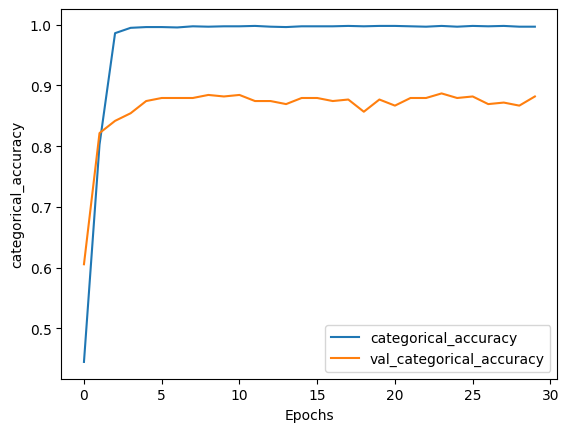

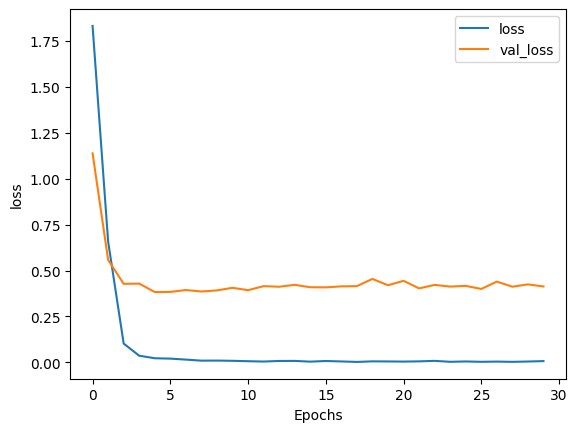

13/13 [==============================] - 0s 2ms/step
[[0.4340058  0.18637536 0.99995863 ... 0.04148788 0.1187487  0.8809395 ]
 [0.403944   0.45581892 0.99984694 ... 0.06445223 0.10578647 0.5545858 ]
 [0.31005657 0.37924194 0.99952114 ... 0.02187115 0.03500978 0.99946016]
 ...
 [0.3526888  0.49810618 0.83955127 ... 0.10629658 0.06406069 0.97807807]
 [0.24918087 0.40029532 0.51716024 ... 0.09520963 0.04325273 0.998422  ]
 [0.24482061 0.07657656 0.83184433 ... 0.08177457 0.04720283 0.9998566 ]]


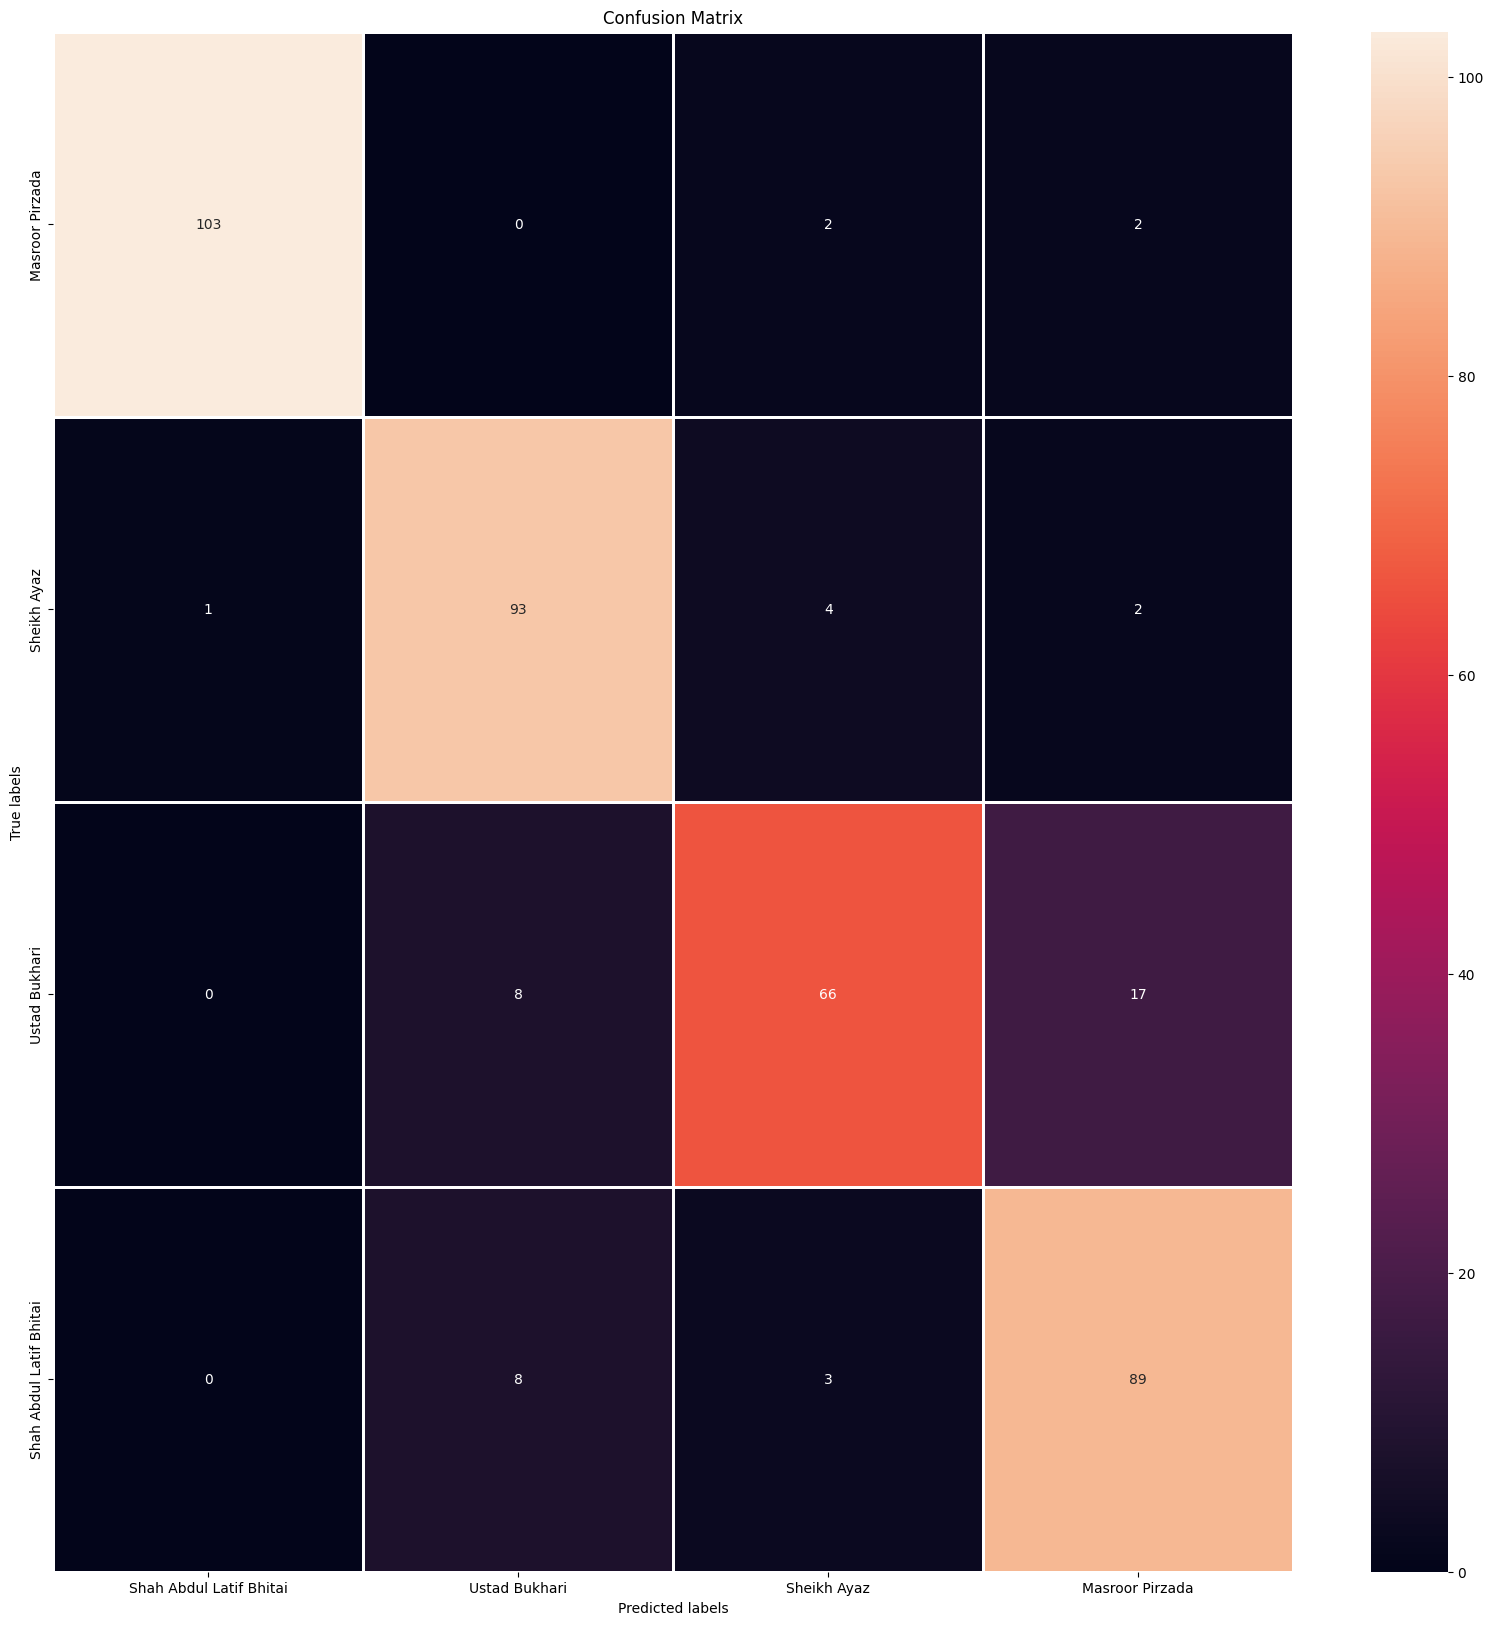

In [ ]:
# Plot the accuracy and loss history
print(results)
print(history_flatten.history)
overallA.append(history_flatten.history["categorical_accuracy"])
overallL.append(history_flatten.history["loss"])


plot_graphs(history_flatten, 'categorical_accuracy')
plot_graphs(history_flatten, 'loss')

pred=model_flatten.predict(val_testing_padded)
print(pred)
y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(cm, linewidths=1,annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(xLabels); ax.yaxis.set_ticklabels(xLabels[::-1]);